In [75]:
import matplotlib.pyplot as plt
import numpy as np
import os, torch
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torchvision.utils as utils
import torch.utils.data as data_utils

In [76]:
torch.__version__, torch.cuda.is_available()

('2.3.0+cu118', False)

In [77]:
train_data = dataset.MNIST(root="mnist", train=True, transform=transforms.ToTensor(), download=True)
test_data = dataset.MNIST(root="mnist", train=False, transform=transforms.ToTensor(), download=True)

In [78]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [79]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist
    Split: Test
    StandardTransform
Transform: ToTensor()

In [80]:
image, label = train_data[0]
image = image.numpy().transpose(1, 2, 0)
image.shape

(28, 28, 1)

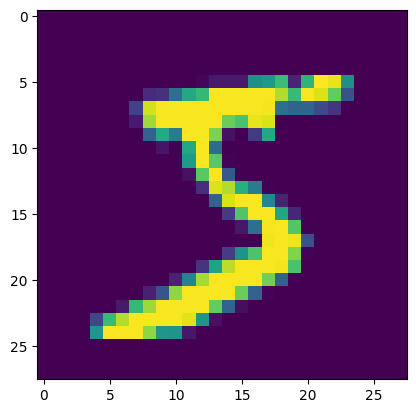

In [81]:
plt.imshow(image)
plt.show()

In [82]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [83]:
large = 30000

In [84]:
X = train_data.data.numpy()[:large]
X.shape

(30000, 28, 28)

In [85]:
y = train_data.targets.numpy()[:large]
y.shape

(30000,)

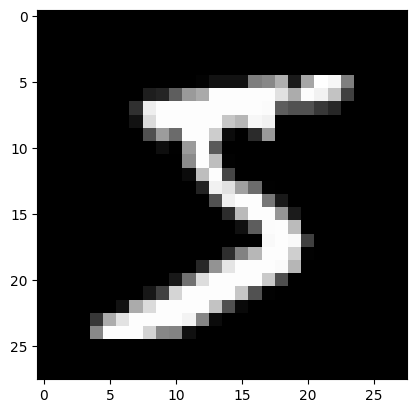

In [86]:
data = np.reshape(np.array(X[0], dtype=int), [28, 28])
plt.figure()
plt.imshow(data, cmap='gray')

In [87]:
ratio = 0.9
split = int(len(X) * ratio)
split

27000

In [88]:
np.random.seed(0)
idx = np.random.permutation(np.arange(len(X)))
X = X[idx]
y = y[idx]

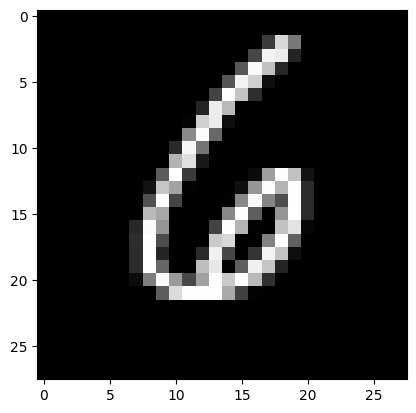

In [89]:
def show_mnist_img(x):
    data = np.reshape(np.array(x, dtype=int), [28, 28])
    plt.figure()
    plt.imshow(data, cmap='gray')
show_mnist_img(X[0])

In [90]:
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

In [91]:
X[0].shape

(28, 28)

In [92]:
distance(X[0], X[1])

130.04614565607088

In [93]:
def random_X_distance_check():
    d1 = np.random.randint(0, len(y))
    d2 = np.random.randint(0, len(y))
    return(distance(X[d1], X[d2]))
check = []
for i in range(10):
    check.append(random_X_distance_check())
check

[126.25767303415662,
 141.9859147943908,
 131.73837709642547,
 100.70253224224304,
 134.16407864998737,
 125.09996003196804,
 144.61673485458036,
 121.43722658229642,
 138.1195134656939,
 145.17575555167605]

In [94]:
predict = np.zeros(shape=[len(X)])
X_hat = test_data.data.numpy()[:large]
y_hat = test_data.targets.numpy()[:large]
for i, x in enumerate(X_hat):
        print(i, " ", x.shape)

0   (28, 28)
1   (28, 28)
2   (28, 28)
3   (28, 28)
4   (28, 28)
5   (28, 28)
6   (28, 28)
7   (28, 28)
8   (28, 28)
9   (28, 28)
10   (28, 28)
11   (28, 28)
12   (28, 28)
13   (28, 28)
14   (28, 28)
15   (28, 28)
16   (28, 28)
17   (28, 28)
18   (28, 28)
19   (28, 28)
20   (28, 28)
21   (28, 28)
22   (28, 28)
23   (28, 28)
24   (28, 28)
25   (28, 28)
26   (28, 28)
27   (28, 28)
28   (28, 28)
29   (28, 28)
30   (28, 28)
31   (28, 28)
32   (28, 28)
33   (28, 28)
34   (28, 28)
35   (28, 28)
36   (28, 28)
37   (28, 28)
38   (28, 28)
39   (28, 28)
40   (28, 28)
41   (28, 28)
42   (28, 28)
43   (28, 28)
44   (28, 28)
45   (28, 28)
46   (28, 28)
47   (28, 28)
48   (28, 28)
49   (28, 28)
50   (28, 28)
51   (28, 28)
52   (28, 28)
53   (28, 28)
54   (28, 28)
55   (28, 28)
56   (28, 28)
57   (28, 28)
58   (28, 28)
59   (28, 28)
60   (28, 28)
61   (28, 28)
62   (28, 28)
63   (28, 28)
64   (28, 28)
65   (28, 28)
66   (28, 28)
67   (28, 28)
68   (28, 28)
69   (28, 28)
70   (28, 28)
71   (28, 28)
72

In [95]:
def point_distance_with_array(point, array):
    pa_distance = []
    for i in array:
        pa_distance.append(distance(point, i))
    return pa_distance
pa = point_distance_with_array(X[0], X_hat)
pa[1:10]

[142.85307137055193,
 122.12288892750614,
 142.60084151224353,
 137.09850473291092,
 123.1990259701756,
 137.66989503882104,
 132.03408650799233,
 140.65916251705752,
 139.0215810584817]

In [96]:
np.argsort(pa)[:10]

array([4356, 1835, 4869, 5637, 8058, 3741, 8575,  929, 3747, 3878])

In [97]:
def point_array_distance_argsort(point, array, k):
    pa = []
    for i in array:
        pa.append(distance(i, point))
    return np.argsort(pa)[:k]

In [98]:
class KNN:
    def __init__(self, k, label_num):
        self.k = k
        self.label_num = label_num
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def get_knn_indices(self, x):
        return point_array_distance_argsort(x, self.X, self.k)
    
    def get_label(self, x):
        knn_indices = self.get_knn_indices(x)
        label_stastistic = np.zeros(shape=[self.label_num])
        for idx in knn_indices:
            label = int(self.y[idx])
            label_stastistic[label] += 1
        return np.argmax(label_stastistic)

    def predict(self, X_hat):
        predicted_test_labels = np.zeros(shape=[len(X_hat)], dtype=int)
        for i, x in enumerate(X_hat):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels

In [ ]:
for k in range(1, 10):
    knn = KNN(k, label_num=10)
    knn.fit(X, y)
    predict_labels = knn.predict(X_hat)
    acc = np.mean(predict_labels == y_hat)
    print(f'K: {k}, acc:{acc * 100 :.1f}%')